## Boston Housing Dataset Description
### Origin
#### The origin of the boston housing data is Natural.
- Usage
This dataset may be used for Assessment.
- Number of Cases
The dataset contains a total of 506 cases.
- Order
The order of the cases is mysterious.
###  Variables
#### There are 14 attributes in each case of the dataset. They are:
- CRIM - per capita crime rate by town
- ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS - proportion of non-retail business acres per town.
- CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- NOX - nitric oxides concentration (parts per 10 million)
- RM - average number of rooms per dwelling
- AGE - proportion of owner-occupied units built prior to 1940
- DIS - weighted distances to five Boston employment centres
- RAD - index of accessibility to radial highways
- TAX - full-value property-tax rate per \$10,000
- PTRATIO - pupil-teacher ratio by town
- B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT - \% lower status of the population
- MEDV - Median value of owner-occupied homes in \$1000's
#### Note
Variable \#14 seems to be censored at 50.00 (corresponding to a median price of \\$50,000). Censoring is suggested by the fact that the highest median price of exactly \\$50,000 is reported in 16 cases, while 15 cases have prices between \\$40,000 and \\$50,000, with prices rounded to the nearest hundred. Harrison and Rubinfeld do not mention any censoring.


In [1]:
# Increase Jupyter display cell-width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:75% !important; }</style>"))

In [2]:
# Download & import Boston & California housing datasets
from sklearn.datasets import fetch_california_housing
from sklearn.datasets import load_boston
from sklearn import linear_model
boston = load_boston()
california = fetch_california_housing()

In [3]:
# Import standard libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

In [4]:
import matplotlib.pyplot as plt
import numpy as np
# import matplotlib.mlab as mlab
"""mlab.normpdf is deprecated"""
import math
from scipy.stats import norm

In [5]:
# Instruct the Notebook to represent any graphic output in the Notebook itself using the magic command:
%matplotlib inline

In [6]:
# Create DataFrame with Boston housing dataset
dataset = pd.DataFrame(boston.data, columns=boston.feature_names)
dataset['target'] = boston.target

In [7]:
observations = len(dataset)
variables = dataset.columns[:-1]
"""X = dataset.ix[:, :-1] 
'ix' is replaced with .iloc for location!""" 
X = dataset.iloc[:,:-1]
y = dataset['target'].values

In [8]:
import statsmodels.api as sm
import statsmodels.formula as smf

In [9]:
"""Let's also prepare a suitable input matrix, naming it Xc after having it incremented by an extra
column containing the bias vector (a constant variable having the unit value):"""
Xc = sm.add_constant(X)
linear_regression = sm.OLS(y, Xc)
fitted_model = linear_regression.fit()

In [10]:
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Thu, 17 Jun 2021   Prob (F-statistic):          6.72e-135
Time:                        08:42:07   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.000      26.432      46.487
CRIM          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
ZN             0.0464      0.014      3.382      0.001       0.019       0.073
INDUS          0.0206      0.061      0.334      0.738      -0.100       0.141
CHAS           2.6867      0.862      3.118      0.002       0.994       4.380
NOX          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
RM             3.8099      0.418      9.116      0.000       2.989       4.631
AGE            0.0007      0.013      0.052      0.958      -0.025       0.027
DIS           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
RAD            0.3060      0.066      4.613      0.000       0.176       0.436
TAX           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
PTRATIO       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
B              0.0093      0.003      3.467      0.001       0.004       0.015
LSTAT         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### The adjusted R-squared considers the complexity of the model and reports a much more realistic R-squared measure.
Just make a ratio between the plain and the adjusted R-squared measure. Check if their difference exceeds
20%. If it does, it means that we have introduced some redundant variables inside our model specification.
Naturally, the larger the ratio difference, the more serious the problem.

### Be aware that variables with a low p-value are good candidates for being removed from the model because there will probably be little proof that their estimated coefficient is different from zero.

### When a condition number is over the score of 30, there's a clear signal that unstable results are rendering the result less reliable. Predictions may be affected by errors and the coefficients may drastically change when rerunning the same regression analysis with a subset or a different set of observations.

In [11]:
# linear_regression = sm.OLS(formula = 'target ~ CRIM + ZN +INDUS + CHAS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + B + LSTAT', data=dataset)
# fitted_model = linear_regression.fit()

"""Code deprecated"""

'Code deprecated'

### To determine the manner and number of predictors affecting each other, the right tool is a correlation matrix, which, though a bit difficult to read when the number of the features is high, is still the most direct way to ascertain the presence of shared variance:

In [12]:
X = dataset.iloc[:, :-1]
correlation_matrix = X.corr()
print(correlation_matrix)

             CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B       -0.385064  0.175520 

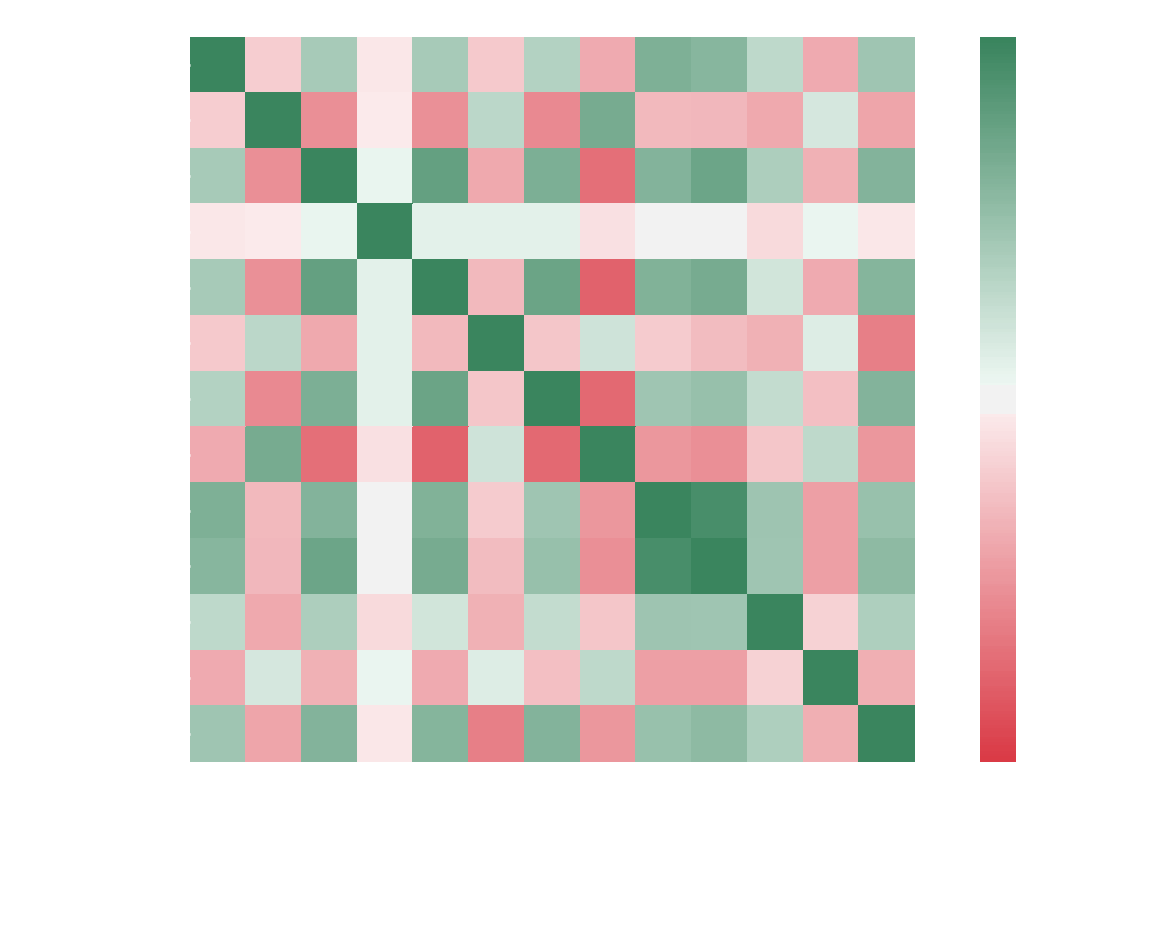

In [19]:
# Correlation matrix in Seaborn

import seaborn as sns

corr = X.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(10, 145, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

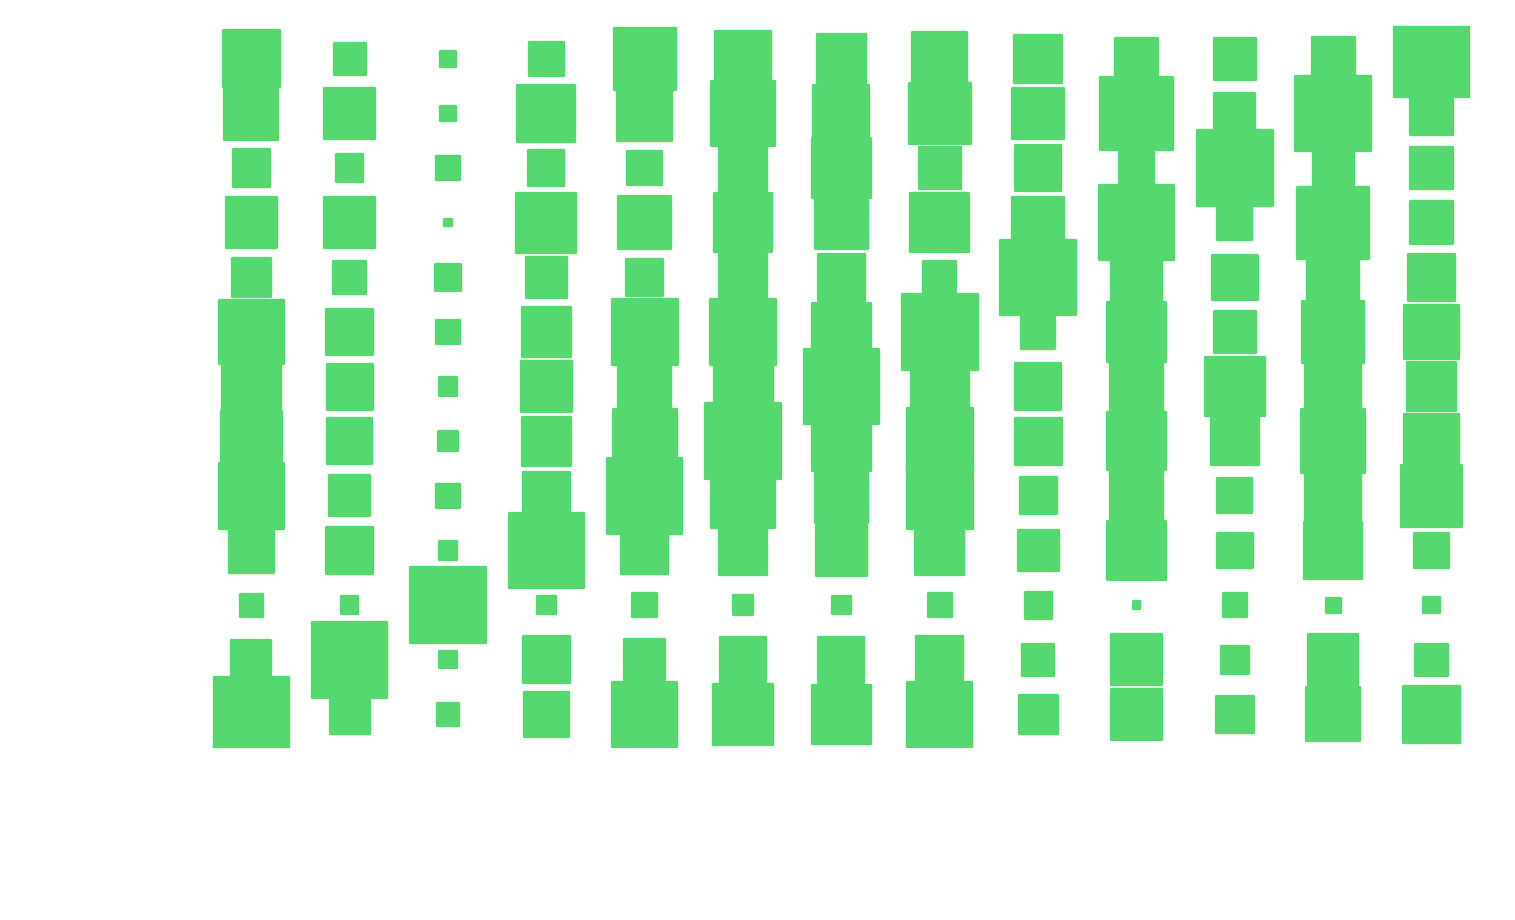

In [22]:
# Step 1 - Make a scatter plot with square markers, set column names as labels

def heatmap(x, y, size):
    fig, ax = plt.subplots()
    
    # Mapping from column names to integer coordinates
    x_labels = [v for v in sorted(x.unique())]
    y_labels = [v for v in sorted(y.unique())]
    x_to_num = {p[1]:p[0] for p in enumerate(x_labels)} 
    y_to_num = {p[1]:p[0] for p in enumerate(y_labels)} 
    
    size_scale = 500
    ax.scatter(
        x=x.map(x_to_num), # Use mapping for x
        y=y.map(y_to_num), # Use mapping for y
        s=size * size_scale, # Vector of square sizes, proportional to size parameter
        marker='s' # Use square as scatterplot marker
    )
    
    # Show column labels on the axes
    ax.set_xticks([x_to_num[v] for v in x_labels])
    ax.set_xticklabels(x_labels, rotation=45, horizontalalignment='right')
    ax.set_yticks([y_to_num[v] for v in y_labels])
    ax.set_yticklabels(y_labels)
    
columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'] 
corr = X[columns].corr()
corr = pd.melt(corr.reset_index(), id_vars='index') # Unpivot the dataframe, so we can get pair of arrays for x and y
corr.columns = ['x', 'y', 'value']
heatmap(
    x=corr['x'],
    y=corr['y'],
    size=corr['value'].abs()
)

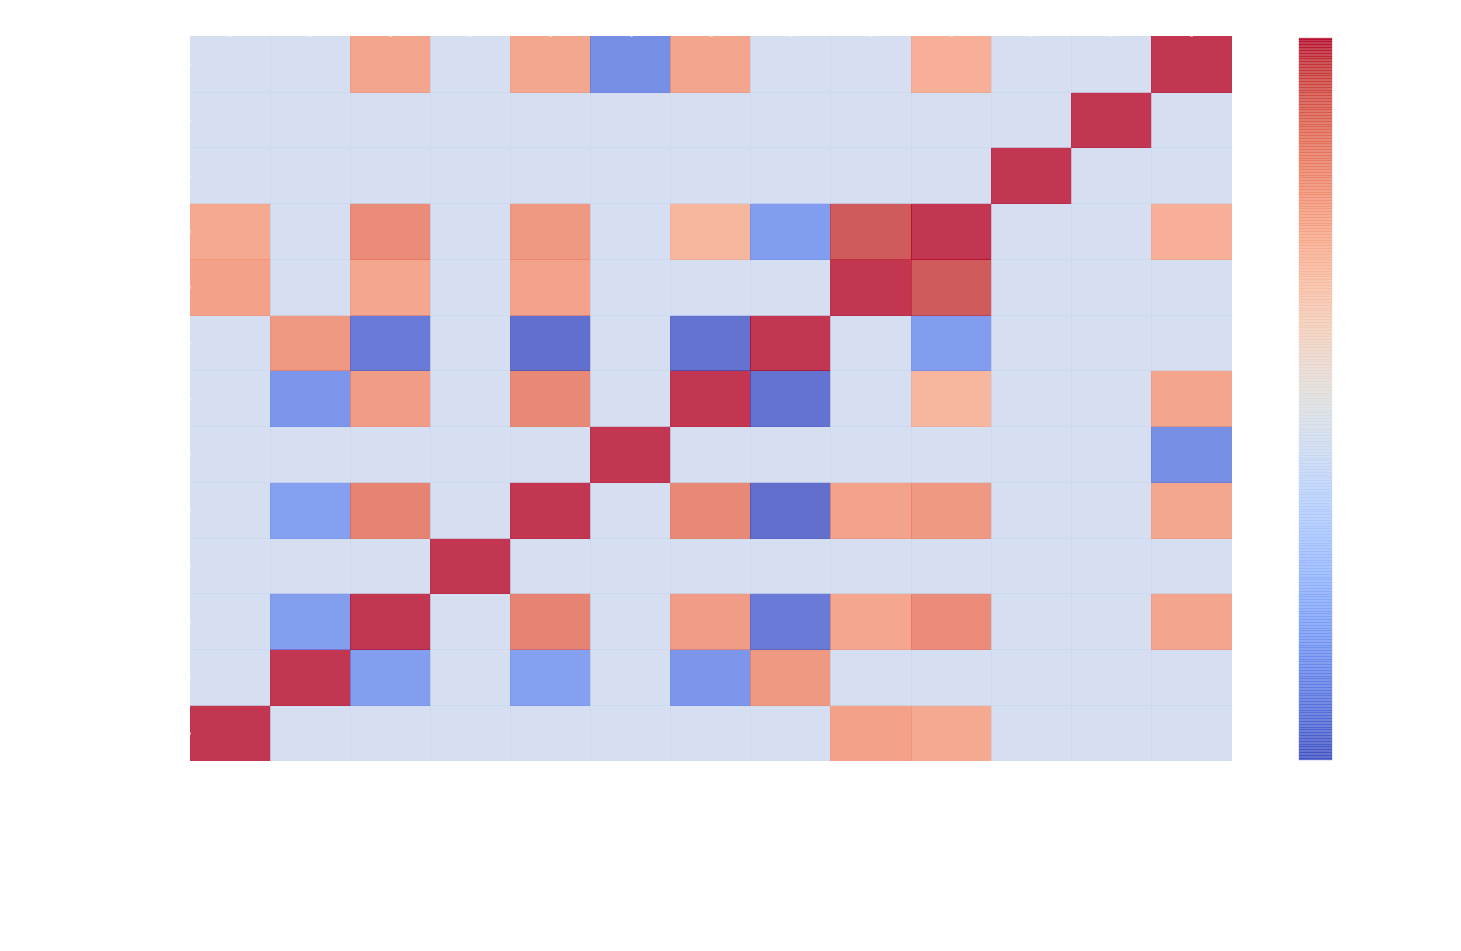

In [23]:
# Textbook heatmap 

def visualize_correlation_matrix(data, hurdle = 0.0):
    R = np.corrcoef(data, rowvar=0)
    R[np.where(np.abs(R)<hurdle)] = 0.0
    heatmap = plt.pcolor(R, cmap=mpl.cm.coolwarm, alpha=0.8)
    heatmap.axes.set_frame_on(False)
    heatmap.axes.set_yticks(np.arange(R.shape[0]) + 0.5, minor=False)
    heatmap.axes.set_xticks(np.arange(R.shape[1]) + 0.5, minor=False)
    heatmap.axes.set_xticklabels(variables, minor=False)
    plt.xticks(rotation=90)
    heatmap.axes.set_yticklabels(variables, minor=False)
    plt.tick_params(axis='both', which='both', bottom='off', \
    top='off', left = 'off', right = 'off')
    plt.colorbar()
    plt.show()

visualize_correlation_matrix(X, hurdle=0.5)

### Using the NumPy linalg.eig function, resulting in a vector of eigenvalues (representing the amount of recombined variance for each new variable) and eigenvectors (a matrix telling us how the new variables relate to the old ones):

In [24]:
corr  = np.corrcoef(X, rowvar = 0)
eigenvalues, eigenvectors = np.linalg.eig(corr)

In [25]:
print(eigenvalues)

[6.12684883 1.43327512 1.24261667 0.85757511 0.83481594 0.65740718
 0.53535609 0.39609731 0.06350926 0.27694333 0.16930298 0.18601437
 0.22023782]


In [33]:
eigenvalues_column = np.array(eigenvalues)
display(eigenvalues_column)

array([6.12684883, 1.43327512, 1.24261667, 0.85757511, 0.83481594,
       0.65740718, 0.53535609, 0.39609731, 0.06350926, 0.27694333,
       0.16930298, 0.18601437, 0.22023782])

In [36]:
from sympy import *
init_printing(use_unicode=True)

Matrix([6.12684883, 1.43327512, 1.24261667, 0.85757511, 0.83481594, 0.65740718,
 0.53535609, 0.39609731, 0.06350926, 0.27694333, 0.16930298, 0.18601437,
 0.22023782])

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


⎡6.12684883⎤
⎢          ⎥
⎢1.43327512⎥
⎢          ⎥
⎢1.24261667⎥
⎢          ⎥
⎢0.85757511⎥
⎢          ⎥
⎢0.83481594⎥
⎢          ⎥
⎢0.65740718⎥
⎢          ⎥
⎢0.53535609⎥
⎢          ⎥
⎢0.39609731⎥
⎢          ⎥
⎢0.06350926⎥
⎢          ⎥
⎢0.27694333⎥
⎢          ⎥
⎢0.16930298⎥
⎢          ⎥
⎢0.18601437⎥
⎢          ⎥
⎣0.22023782⎦

In [37]:
print(eigenvectors[:, 8])

[-0.0459523   0.08091897  0.25107654 -0.03592171 -0.04363045 -0.0455671
  0.03855068  0.01829854  0.63348972 -0.72023345 -0.02339805  0.00446307
 -0.02443168]


In [38]:
print(variables[2], variables[8], variables[9])

INDUS RAD TAX


#### Standardization is preferable, both because it easily permits retuning the obtained standardized coefficients into their original scale and also because, by centering all the features at the zero mean, it makes the error surface more tractable by many machine learning algorithms, in a much more effective way than just rescaling the maximum and minimum of a variable.

#### An important reminder when applying feature scaling is that changing the scale of the features implies that you will have to use rescaled features also for predictions, unless you can recalculate the coefficients as if the variables had never been rescaled.

In [41]:
from sklearn.preprocessing import StandardScaler
observations = len(dataset)
variables = dataset.columns
standardization = StandardScaler()
Xst = standardization.fit_transform(X)
original_means = np.mean(X)
original_stds = np.std(X)
Xst = np.column_stack((Xst, np.ones(observations)))
y = dataset['target'].values

#### In the preceding code, we just standardized the variables using the StandardScaler class from Scikit-learn. This class can fit a data matrix, record its column means and standard deviations, and operate a transformation on itself, as well as on any other similar matrix, standardizing the column data. With this method, after fitting we keep a track of means and standard deviations that have been used because they will come in handy later when we have to recalculate the coefficients using the original scale:

In [46]:
import random

def random_w( p ):
    return np.array([np.random.normal() for j in range(p)])
def hypothesis(X,w):
    return np.dot(X,w)

def loss(X,w,y):
    return hypothesis(X,w) - y

def squared_loss(X,w,y):
    return loss(X,w,y)**2

def gradient(X,w,y):
    gradients = list()
    n = float(len( y ))
    for j in range(len(w)):
        gradients.append(np.sum(loss(X,w,y) * X[:,j]) / n)
    return gradients

def update(X,w,y, alpha=0.01):
    return [t - alpha*g for t, g in zip(w, gradient(X,w,y))]

def optimize(X,y, alpha=0.01, eta = 10**-12, iterations = 1000):
    w = random_w(X.shape[1])
    path = list()
    for k in range(iterations):
        SSL = np.sum(squared_loss(X,w,y))
    new_w = update(X,w,y, alpha=alpha)
    new_SSL = np.sum(squared_loss(X,new_w,y))
    w = new_w
    if k>=5 and (new_SSL - SSL <= eta and \
    new_SSL - SSL >= -eta):
        path.append(new_SSL)
          return w, path
        if k % (iterations / 20) == 0:
            path.append(new_SSL)
    return w, path

alpha = 0.02
w, path = optimize(Xst, y, alpha, eta = 10**-12, \iterations = 20000)
print ("These are our final standardized coefficients: " + ', \'.join(map(lambda x: "%0.4f" % x, w))) 

IndentationError: unexpected indent (<ipython-input-46-0d575ada77cd>, line 35)